# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Wintersemester 2025/26)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 22.08.2025

### Erster Vorlesungsteil:  
#### Die 19 Klassen der evolutionären symmetrischen ($2\times3$)-Spiele 


## Einführung

In diesem Unterkapitel werden die evolutionären symmetrischen ($2\times 3$)-Spiele analysiert. Symmetrische ($2\times m$)-Spiele werden durch die folgende Differenzialgleichung beschrieben:

$$
\begin{equation}
\frac{d \vec{x}}{dt} = \hat{\bf x} \left( \hat{\bf {\cal \$}}\,\vec{x} \right) -  \left(\left(\hat{\bf {\cal \$}}\,\vec{x} \right)^T \vec{x} \right) \vec{x}
\end{equation}
$$
Aufgrund der Symmetrie der Auszahlungsmatrix $\hat{\bf {\cal \$}} = \hat{\bf {\cal \$}}^A = \left( \hat{\bf {\cal \$}}^B \right)^{\!T}$ kann die zeitliche Entwicklung solcher Spiele durch nur einen Populationsvektor ($\vec{x}(t)=(x_1(t), x_2(t), ..., x_{m}(t))$ beschrieben werden. 

Wir beschränken uns im Folgenden auf den Fall $m=3$ und setzen die Auszahlungsmatrix wie folgt an:

$$
\begin{equation}
\hat{\bf {\cal \$}} =  
\left(
\begin{array}{rrr} 
\$_{11} & \$_{12} & \$_{13}\\ 
\$_{21} & \$_{22} & \$_{23}\\ 
\$_{31} & \$_{32} & \$_{33}\\ 
\end{array}
\right)
\end{equation}
$$

Aufgrund der Normalisierungsbedingung des Populationsvektors kann man den Anteil der Population, die die Strategie drei spielen, durch die anderen beiden Anteile ausdrücken: $x_3(t)=1 - x_1(t) - x_2(t)$.

Wir betrachten uns zunächst das entstehende System von Differenzialgleichungen.

## Die Gleichungen der Replikatordynamik im evolutionären symmetrischen ($2\times3$)-Spiel

In [1]:
from sympy import *
init_printing()

Definition der Auszahlungsmatrix und des Populationsvektors:

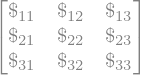

In [2]:
D11,D12,D13,D21,D22,D23,D31,D32,D33 = symbols('\\$_{11},\\$_{12},\\$_{13},\\$_{21},\\$_{22},\\$_{23},\\$_{31},\\$_{32},\\$_{33}')
D = Matrix([[D11,D12,D13],[D21,D22,D23],[D31,D32,D33]])
D

In [3]:
t = symbols('t')
x1 = Function('x_1')(t)
x2 = Function('x_2')(t)
x3 = Function('x_3')(t)
x = Matrix([x1,x2,x3])
x

Definition des Systems von Differenzialgleichungen:

In [4]:
DiffPop = Eq(x.diff(t),diag(x1,x2,x3)*D*x - (transpose(D*x)*x)[0]*x)
DiffPop

Einarbeitung der Normalisierungsbedingung des Populationsvektors:

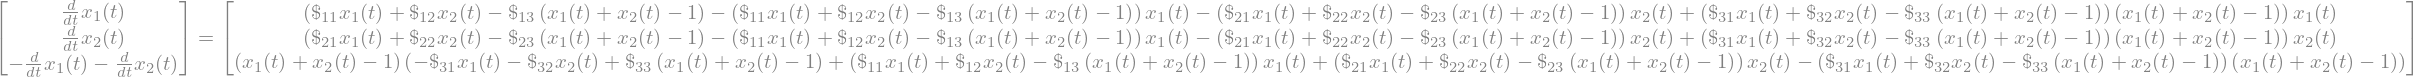

In [5]:
DiffPop1 = Eq(x.subs([(x3,1-x1-x2)]).diff(t),simplify(DiffPop.rhs.subs([(x3,1-x1-x2)])))
DiffPop1

Die dritte dieser Gleichungen liefert keine neue Information, sodass wir es hier mit einem System von zwei gekoppelten, nichtlinearen Differenzialgleichungen erster Ordnung zu tun haben. Um dieses System von Differenzialgleichungen numerisch lösen zu können, müssen wir die Parameter der Auszahlungsmatrix festlegen. Wir wählen z.B.:

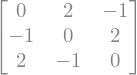

In [6]:
#1.Zeeman Klasse
D11_1=0
D12_1=2
D13_1=-1
D21_1=-1
D22_1=0
D23_1=2
D31_1=2
D32_1=-1
D33_1=0
D.subs([(D11,D11_1),(D12,D12_1),(D13,D13_1),(D21,D21_1),(D22,D22_1),(D23,D23_1),(D31,D31_1),(D32,D32_1),(D33,D33_1)])

Die erste Differenzialgleichung hat nun das folgende explizite Aussehen:

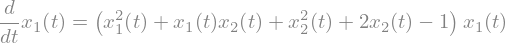

In [7]:
DiffPop2a=Eq(x[0].diff(t),simplify(DiffPop1.rhs[0].subs([(D11,D11_1),(D12,D12_1),
            (D13,D13_1),(D21,D21_1),(D22,D22_1),(D23,D23_1),
            (D31,D31_1),(D32,D32_1),(D33,D33_1)])))
DiffPop2b=Eq(x[1].diff(t),simplify(DiffPop1.rhs[1].subs([(D11,D11_1),(D12,D12_1),
            (D13,D13_1),(D21,D21_1),(D22,D22_1),(D23,D23_1),
            (D31,D31_1),(D32,D32_1),(D33,D33_1)])))
DiffPop2a

Die zweite Differenzialgleichung lautet:

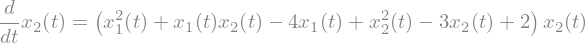

In [8]:
DiffPop2b

## Numerische Lösung der Gleichungen an einem Beispiel

Zusätzlich benutzen wir die Funktion lambdify() um die numerischen Werte der Differenzialgleichungen zu erhalten (siehe https://docs.sympy.org/latest/modules/utilities/lambdify.html ):

In [9]:
DiffPop3a = lambdify([t,(x1,x2)], DiffPop2a.rhs)
DiffPop3b = lambdify([t,(x1,x2)], DiffPop2b.rhs)

Wir definieren das Differenzialgleichungssystem als eine Funktion:

In [10]:
def DGLsys(t,vx):
    x1, x2 = vx
    dx1dt = DiffPop3a(t,(x1,x2))
    dx2dt = DiffPop3b(t,(x1,x2))
    return [dx1dt,dx2dt]

Zum numerischen Lösen des Systems der Differenzialgleichungen lesen wir die folgenden Python Module ein:

In [11]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
from scipy.integrate import solve_ivp
params = {
    'figure.figsize'    : [8,5],
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

Wir legen die Anfang-Strategienwahl der Population fest (hier $x_1(0)=0.06$, $x_2(0)=0.9$ $\,\,\rightarrow \, x_3(0)=0.04$) und lösen das DGL-System numerisch.

In [12]:
t_val = np.linspace(0, 15, 1000)
x1_0 = 0.06
x2_0 = 0.9
Loes = solve_ivp(DGLsys, [0, 15], [x1_0, x2_0], t_eval=t_val)

Die numerischen Lösungen der zeitlichen Entwicklung der Strategienwahl stellen wir grafisch dar:

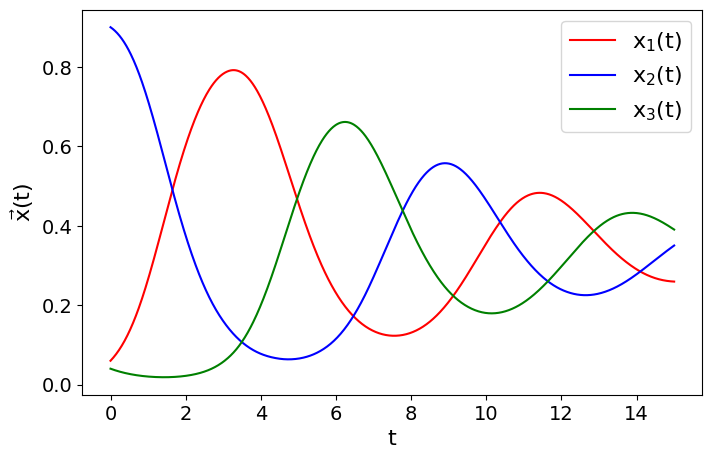

In [13]:
plt.xlabel(r"$\rm t$")
plt.ylabel(r"$\rm \vec{x}(t)$")
plt.plot(Loes.t, Loes.y[0],c="red", label=r"$\rm x_1(t)$");
plt.plot(Loes.t, Loes.y[1],c="blue", label=r"$\rm x_2(t)$");
plt.plot(Loes.t, 1 - Loes.y[0] - Loes.y[1],c="green", label=r"$\rm x_3(t)$");
plt.legend(loc='upper right',fontsize=16);

Die zeitliche Entwicklung der Strategiewahl der Population kann man sich auch in einem baryzentrischen Dreiecks-Koordinatensystem veranschaulichen, wobei der x-Achsen Wert durch $x:=x_2+x_3/2$ und der y-Achsen Wert durch $y:=x_3$ definiert ist.

Zunächst schreiben wir das System der Differenzialgleichungen in die neuen Koordinaten um:

In [14]:
x = Function('x')(t)
y = Function('y')(t)
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.rhs.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.rhs.subs([(x2,x-y/2),(x1,1-x-y/2)]))

In [15]:
def DGLsysbary(t,vxy):
    x, y = vxy
    dxdt = DiffPop4b(t,(x,y))-(DiffPop4a(t,(x,y))+DiffPop4b(t,(x,y)))/2.0
    dydt = -DiffPop4a(t,(x,y))-DiffPop4b(t,(x,y))
    return [dxdt,dydt]

... und berechnen dann die numerische Lösung für die schon oben gewählten Anfangsbedingungen ($x_1(0)=0.06$, $x_2(0)=0.9$, $x_3(0)=0.04$) $\,\rightarrow \,$ $x(0)=0.9 + 0.04/2 = 0.92$ und $y(0)=0.04$.

In [16]:
t_val = np.linspace(0, 25, 1000)
x_0 = 0.92
y_0 = 0.04
Loesbary = solve_ivp(DGLsysbary, [0, 25], [x_0,y_0], t_eval=t_val)

In [17]:
import matplotlib.colors as colors
params = {
    'figure.figsize'    : [8,6],
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params) 

Ähnlich wie bei den Bi-Matrix Spielen veranschaulichen wir zusätzlich zur numerischen Lösung, im Hintergrund der Abbildung, das zugrundeliegende Feldlinienbild der Populationsdynamik.

In [18]:
Y, X = np.mgrid[0:1:100j, 0:1:100j]
gX = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed = np.sqrt(gX**2 + gY**2)
colorspeed = speed

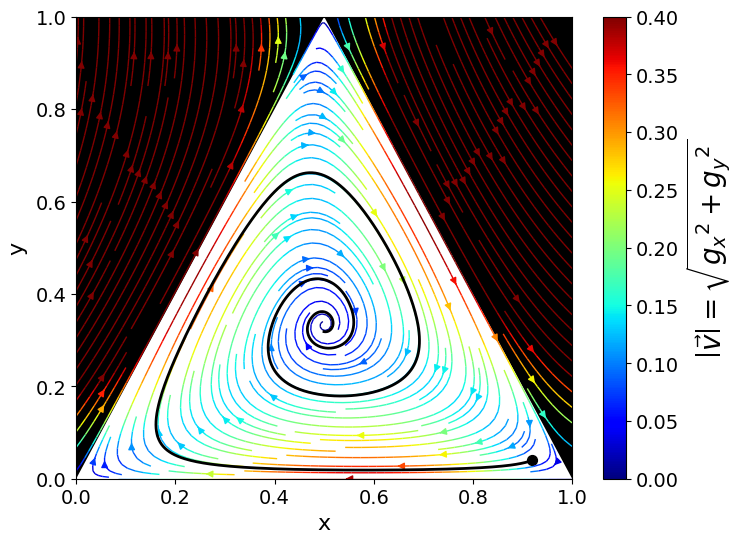

In [19]:
plt.cla()
plt.xlabel(r"$\rm x$")
plt.ylabel(r"$\rm y$")
figure = plt.streamplot(X, Y, gX, gY, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed, cmap=plt.cm.jet)
plt.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
plt.fill([1,0.5,1], [0,1,1], facecolor='black')
plt.scatter(x_0, y_0, s=50, marker='o', c="black")
plt.plot(Loesbary.y[0], Loesbary.y[1],c="black",linewidth=2)
cbar=plt.colorbar(figure.lines, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=20)
plt.xlim(0, 1)
plt.ylim(0, 1);

Die Richtungspfeile des Feldliniendiagramms beschreiben die Richtung der zeitlichen Entwicklung der Strategiewahl im baryzentrischen Dreiecks-Koordinatensystem. Die Ecken des Dreiecks stellen die reinen Strategien dar; z.B. repräsentiert die untere linke Ecke bei (x=0,y=0) die reine Strategie $x_1$, bei der jeder Spieler der Population die Strategie $s_1$ wählt. Die Farbe der Feldlinien ist durch den Betrag der Geschwindigkeit der Änderung der Strategiewahl der Population bestimmt ($\left| \vec{v}(x,y) \right|$).

Sowohl die Feldlinien, als auch die spezielle Lösung der Differenzialgleichung bei festgelegter Anfangsbedingung (schwarze Kurve) zeigen, dass sich bei diesem Spiel die Population in schneckenförmiger Struktur zum Zentrum bewegt. Unabhängig von der Wahl der Anfangsbedingung strebt die Strategiewahl der Population zum gemischten Nash-Gleichgewicht des Spiels, welche die einzige evolutionär stabile Strategie darstellt.

Wir veranschaulichen uns wieder die zeitliche Entwicklung in einer Animation:

In [20]:
import matplotlib.animation as animation
from IPython.display import HTML

In [21]:
step = 20
fig = plt.figure()
ax = fig.gca()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel(r"$\rm x$")
ax.set_ylabel(r"$\rm y$")
stream = ax.streamplot(X, Y, gX, gY, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed, cmap=plt.cm.jet)
ax.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax.fill([1,0.5,1], [0,1,1], facecolor='black')
ax.scatter(x_0, y_0, s=70, marker='o', c="black")
cbar = plt.colorbar(stream.lines, ax=ax, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=20)

def animate(i):
    ax.scatter(Loesbary.y[0][step*i], Loesbary.y[1][step*i], s=20, marker='o', c="grey")
    ax.plot(Loesbary.y[0][:step*i], Loesbary.y[1][:step*i],c="black",linewidth=2)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=50,interval=200)
plt.close(ani._fig)
HTML(ani.to_html5_video())

### Das gemischte Nash-Gleichgewicht eines symmetrischen ($2\times3$)-Spiels

Im Folgenden möchten wir das gemischte Nash-Gleichgewicht des Spiels berechnen. Ausgehend von der ursprünglichen gemischten Auszahlungsfunktion ${{\bf \cal {\tilde{\$}}} = \bf {\cal{\tilde{\$}}}^A}(x_1,x_2,x_3,y_1,y_2,y_3)$ unter Verwendung der Normalisierungsbedingung der gemischten Strategienwahl von Spieler A ($x_3=1 - x_1 - x_2$) und Spieler B ($y_3=1 - y_1 - y_2$) erhält man die folgenden zwei Bedingungen für das gemischte Nash-Gleichgewicht des Spielers B $(y_1^{\star} , y_2^{\star} , y_3^{\star})$:

$$
\begin{eqnarray}
&&\left. \frac{ \partial {\bf \tilde{\cal \$}}^A(x_1,x_2,y_1,y_2)}{\partial x_1} \right|_{y_1 = y_1^{\star} ,y_2 = y_2^{\star}} \stackrel{!}{=} 0 \quad \forall \,\,\,  x_1 \in [0,1] \,\,\, , \,\,  x_2 \in [0,1] \,\,\, , \,\,   y_1^{\star} \in ]0,1[ \,\,\, , \,\,  y_2^{\star} \in ]0,1[ 
\nonumber\\
&&\left. \frac{ \partial {\bf \tilde{\cal \$}}^A(x_1,x_2,y_1,y_2)}{\partial x_2} \right|_{y_1 = y_1^{\star} ,y_2 = y_2^{\star}} \stackrel{!}{=} 0 \quad \forall \,\,\,  x_1 \in [0,1] \,\,\, , \,\,  x_2 \in [0,1] \,\,\, , \,\,   y_1^{\star} \in ]0,1[ \,\,\, , \,\,  y_2^{\star} \in ]0,1[ 
\nonumber
\end{eqnarray}
$$

Der Spezialfall des gemischten Nash-Gleichgewichtes besteht somit bei der Strategienkombination, bei welcher alle partiellen Ableitungen der gemischten Auszahlungsfunktion verschwinden. Da beide Spieler die gleiche Auszahlungsfunktion besitzen, sind die berechneten Werte der gemischten Nash-Gleichgewichte der Spieler A und B gleich: $(x_1^{\star} , x_2^{\star} , x_3^{\star}) = (y_1^{\star} , y_2^{\star} , y_3^{\star})$

Im Folgenden berechnen wir diese partiellen Ableitungen der Auszahlungsfunktion in gemischten Strategien.

Die gemischte Auszahlungsfunktion lautet:

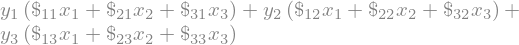

In [23]:
x1s = symbols('x_1')
x2s = symbols('x_2')
x3s = symbols('x_3')
y1s = symbols('y_1')
y2s = symbols('y_2')
y3s = symbols('y_3')
sy1s = symbols('y_1^{\\star}')
sy2s = symbols('y_2^{\\star}')
sy3s = symbols('y_3^{\\star}')
xs = Matrix([x1s,x2s,x3s])
ys = Matrix([y1s,y2s,y3s])
Dollar = transpose(xs)*D*ys
Dollar[0]

Wir nutzen nun die Normalisierungsbedingung des Populationsvektors des Spielers A ($x_3=1 - x_1 - x_2$) und Spielers B ($y_3=1 - y_1 - y_2$) aus und arbeiten diese in die Auszahlungsfunktion ein.

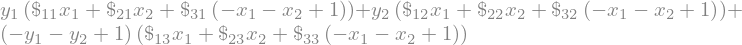

In [24]:
Dollar_subs = Dollar[0].subs(x3s,1-x1s-x2s).subs(y3s,1-y1s-y2s)
Dollar_subs

Die beiden Bestimmungsgleichungen des gemischten Nash-Gleichgewichtes lauten somit:

In [25]:
GemNash_Eq1 = Eq(diff(Dollar_subs,x1s).subs(y1s,sy1s).subs(y2s,sy2s) , 0)
GemNash_Eq2 = Eq(diff(Dollar_subs,x2s).subs(y1s,sy1s).subs(y2s,sy2s)  , 0)
(GemNash_Eq1,GemNash_Eq2)

Die Lösungen des Gleichungssystems lauten:

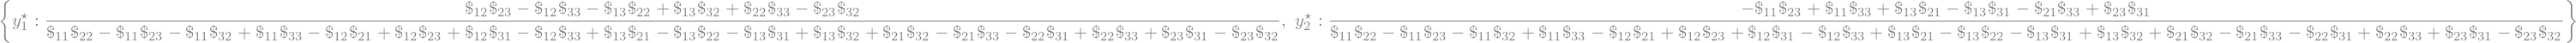

In [26]:
Loes = solve([GemNash_Eq1,GemNash_Eq2], [sy1s, sy2s] )
Loes

Verwendet man z.B. die obere Auszahlungsmatrix der ersten Zeeman Klasse, so erhält man für $y_1^{\star}$

In [27]:
Loes[sy1s].subs([(D11,D11_1),(D12,D12_1),(D13,D13_1),(D21,D21_1),(D22,D22_1),(D23,D23_1),(D31,D31_1),(D32,D32_1),(D33,D33_1)])

und für $y_2^{\star}$

In [28]:
Loes[sy2s].subs([(D11,D11_1),(D12,D12_1),(D13,D13_1),(D21,D21_1),(D22,D22_1),(D23,D23_1),(D31,D31_1),(D32,D32_1),(D33,D33_1)])

und somit ist auch $y_3^{\star} = \frac{1}{3}$. Das berechnete gemischten Nash-Gleichgewicht in den Koordinaten des baryzentrischen Dreiecks-Koordinatensystem berechnet sich somit zu ($\frac{1}{3} + \frac{\frac{1}{3}}{2}$ , $\frac{1}{3}$) = ($\frac{1}{2}$ , $\frac{1}{3}$) $\approx$ (0.5 , 0.33) und stimmt somit mit dem Attraktor der obigen Animation überein.

## Die 19 Klassen der evolutionären symmetrischen ($2\times3$)-Spiele 

Die oben dargestellt zeitliche Entwicklung eines (2x3)-Spiels stellt nur ein Beispiel dar. E. C. Zeeman konnte in seinem im Jahre 1980 ver&ouml;ffentlichten Artikel zeigen, dass man evolution&auml;re, symmetrische (2x3)-Spiele in 19 Klassen einteilen kann. Es gibt Spielklassen, die besitzen lediglich eine evolution&auml;r stabile Strategie (wie die oben dargestellte) und Klassen, die sogar drei evolution&auml;r stabile Strategien besitzen. (siehe <A href="https://lms.ac.uk/sites/lms.ac.uk/files/1980%20Population%20dynamics%20from%20game%20theory%20(preprint).pdf">E.C. Zeeman, POPULATION DYNAMICS FROM GAME THEORY, In: Global Theory of Dynamical Systems, Springer 1980</A>). Im Folgenden wollen wir die weiteren Spielklassen darstellen.

Definition der 19 Auszahlungsmatrizen der Spielklassen:

In [29]:
D11_1,D12_1,D13_1,D21_1,D22_1,D23_1,D31_1,D32_1,D33_1 = 0,2,-1,-1,0,2,2,-1,0
D11_2,D12_2,D13_2,D21_2,D22_2,D23_2,D31_2,D32_2,D33_2 = 0,3,-1,1,0,1,3,-1,0
D11_3,D12_3,D13_3,D21_3,D22_3,D23_3,D31_3,D32_3,D33_3 = 0,1,1,-1,0,3,1,1,0
D11_4,D12_4,D13_4,D21_4,D22_4,D23_4,D31_4,D32_4,D33_4 = 0,6,-4,-3,0,5,-1,3,0
D11_5,D12_5,D13_5,D21_5,D22_5,D23_5,D31_5,D32_5,D33_5 = 0,1,1,1,0,1,1,1,0
D11_6,D12_6,D13_6,D21_6,D22_6,D23_6,D31_6,D32_6,D33_6 = 0,3,-1,3,0,-1,1,1,0
D11_7,D12_7,D13_7,D21_7,D22_7,D23_7,D31_7,D32_7,D33_7 = 0,1,3,-1,0,5,1,3,0
D11_8,D12_8,D13_8,D21_8,D22_8,D23_8,D31_8,D32_8,D33_8 = 0,1,-1,-1,0,1,-1,1,0
D11_9,D12_9,D13_9,D21_9,D22_9,D23_9,D31_9,D32_9,D33_9 = 0,-1,3,-1,0,3,1,1,0
D11_10,D12_10,D13_10,D21_10,D22_10,D23_10,D31_10,D32_10,D33_10 = 0,1,1,-1,0,1,-1,-1,0
D11_11,D12_11,D13_11,D21_11,D22_11,D23_11,D31_11,D32_11,D33_11 = 0,1,1,1,0,1,-1,-1,0
D11_12,D12_12,D13_12,D21_12,D22_12,D23_12,D31_12,D32_12,D33_12 = 0,1,-1,1,0,1,1,-1,0
D11_13,D12_13,D13_13,D21_13,D22_13,D23_13,D31_13,D32_13,D33_13 = 0,-1,-1,1,0,1,-1,1,0
D11_14,D12_14,D13_14,D21_14,D22_14,D23_14,D31_14,D32_14,D33_14 = 0,-1,1,-1,0,1,-1,-1,0
D11_15,D12_15,D13_15,D21_15,D22_15,D23_15,D31_15,D32_15,D33_15 = 0,-1,-1,1,0,-1,-1,-1,0
D11_16,D12_16,D13_16,D21_16,D22_16,D23_16,D31_16,D32_16,D33_16 = 0,-1,-1,1,0,-3,-1,-3,0
D11_17,D12_17,D13_17,D21_17,D22_17,D23_17,D31_17,D32_17,D33_17 = 0,1,-1,-3,0,1,-1,1,0
D11_18,D12_18,D13_18,D21_18,D22_18,D23_18,D31_18,D32_18,D33_18 = 0,1,-3,1,0,-1,-3,-1,0
D11_19,D12_19,D13_19,D21_19,D22_19,D23_19,D31_19,D32_19,D33_19 = 0,-3,-1,-3,0,-1,-1,-1,0

In [30]:
import matplotlib.gridspec as gridspec
params = {
    'figure.figsize'    : [11,3.5],
    'axes.titlesize' : 10,
    'axes.labelsize' : 12,  
    'xtick.labelsize' : 10 ,
    'ytick.labelsize' : 10 
}
matplotlib.rcParams.update(params) 

Es folgen die Animationen der weiteren Spielklassen:

In [31]:
DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_2),(D12,D12_2),
            (D13,D13_2),(D21,D21_2),(D22,D22_2),(D23,D23_2),
            (D31,D31_2),(D32,D32_2),(D33,D33_2)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_2),(D12,D12_2),
            (D13,D13_2),(D21,D21_2),(D22,D22_2),(D23,D23_2),
            (D31,D31_2),(D32,D32_2),(D33,D33_2)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

t_val = np.linspace(0, 25, 1001)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.5
y_0c = 0.85
x_0d = 0.3
y_0d = 0.5
Loesbary1a = solve_ivp(DGLsysbary, [0, 25], [x_0a,y_0a], t_eval=t_val)
Loesbary1b = solve_ivp(DGLsysbary, [0, 25], [x_0b,y_0b], t_eval=t_val)
gX1 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_3),(D12,D12_3),
            (D13,D13_3),(D21,D21_3),(D22,D22_3),(D23,D23_3),
            (D31,D31_3),(D32,D32_3),(D33,D33_3)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_3),(D12,D12_3),
            (D13,D13_3),(D21,D21_3),(D22,D22_3),(D23,D23_3),
            (D31,D31_3),(D32,D32_3),(D33,D33_3)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2a = solve_ivp(DGLsysbary, [0, 25], [x_0a,y_0a], t_eval=t_val)
Loesbary2b = solve_ivp(DGLsysbary, [0, 25], [x_0b,y_0b], t_eval=t_val)
Loesbary2c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
gX2 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_4),(D12,D12_4),
            (D13,D13_4),(D21,D21_4),(D22,D22_4),(D23,D23_4),
            (D31,D31_4),(D32,D32_4),(D33,D33_4)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_4),(D12,D12_4),
            (D13,D13_4),(D21,D21_4),(D22,D22_4),(D23,D23_4),
            (D31,D31_4),(D32,D32_4),(D33,D33_4)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3a = solve_ivp(DGLsysbary, [0, 25], [x_0a,y_0a], t_eval=t_val)
Loesbary3d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX3 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

figure1 = ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
ax1.scatter(x_0a, y_0a, s=50, marker='o', c="black")
ax1.scatter(x_0b, y_0b, s=50, marker='o', c="black")
figure2=ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
ax2.scatter(x_0a, y_0a, s=50, marker='o', c="black")
ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
figure3=ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
ax3.scatter(x_0a, y_0a, s=50, marker='o', c="black")
ax3.scatter(x_0d, y_0d, s=50, marker='o', c="black")
cbar=plt.colorbar(figure1.lines,ax=ax3, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

def animate(i):
    ax1.scatter(Loesbary1a.y[0][step*i], Loesbary1a.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1a.y[0][:step*i], Loesbary1a.y[1][:step*i],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1b.y[0][step*i], Loesbary1b.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1b.y[0][:step*i], Loesbary1b.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2a.y[0][step*i], Loesbary2a.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2a.y[0][:step*i], Loesbary2a.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b.y[0][step*i], Loesbary2b.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b.y[0][:step*i], Loesbary2b.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c.y[0][step*i], Loesbary2c.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c.y[0][:step*i], Loesbary2c.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3a.y[0][step*i], Loesbary3a.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3a.y[0][:step*i], Loesbary3a.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3d.y[0][step*i], Loesbary3d.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3d.y[0][:step*i], Loesbary3d.y[1][:step*i],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=40,interval=400)
plt.close(ani._fig)
HTML(ani.to_html5_video())

In [32]:
DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_5),(D12,D12_5),
            (D13,D13_5),(D21,D21_5),(D22,D22_5),(D23,D23_5),
            (D31,D31_5),(D32,D32_5),(D33,D33_5)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_5),(D12,D12_5),
            (D13,D13_5),(D21,D21_5),(D22,D22_5),(D23,D23_5),
            (D31,D31_5),(D32,D32_5),(D33,D33_5)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

t_val = np.linspace(0, 25, 1000)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.5
y_0c = 0.85
x_0d = 0.3
y_0d = 0.5
Loesbary1a = solve_ivp(DGLsysbary, [0, 25], [x_0a,y_0a], t_eval=t_val)
Loesbary1b = solve_ivp(DGLsysbary, [0, 25], [x_0b,y_0b], t_eval=t_val)
gX1 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_6),(D12,D12_6),
            (D13,D13_6),(D21,D21_6),(D22,D22_6),(D23,D23_6),
            (D31,D31_6),(D32,D32_6),(D33,D33_6)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_6),(D12,D12_6),
            (D13,D13_6),(D21,D21_6),(D22,D22_6),(D23,D23_6),
            (D31,D31_6),(D32,D32_6),(D33,D33_6)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2a = solve_ivp(DGLsysbary, [0, 25], [x_0a,y_0a], t_eval=t_val)
Loesbary2b = solve_ivp(DGLsysbary, [0, 25], [x_0b,y_0b], t_eval=t_val)
Loesbary2d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX2 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_7),(D12,D12_7),
            (D13,D13_7),(D21,D21_7),(D22,D22_7),(D23,D23_7),
            (D31,D31_7),(D32,D32_7),(D33,D33_7)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_7),(D12,D12_7),
            (D13,D13_7),(D21,D21_7),(D22,D22_7),(D23,D23_7),
            (D31,D31_7),(D32,D32_7),(D33,D33_7)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3a = solve_ivp(DGLsysbary, [0, 25], [x_0a,y_0a], t_eval=t_val)
Loesbary3d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX3 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

figure1 = ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
ax1.scatter(x_0a, y_0a, s=50, marker='o', c="black")
ax1.scatter(x_0b, y_0b, s=50, marker='o', c="black")
figure2 = ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
ax2.scatter(x_0a, y_0a, s=50, marker='o', c="black")
ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
figure3 = ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
ax3.scatter(x_0a, y_0a, s=50, marker='o', c="black")
ax3.scatter(x_0d, y_0d, s=50, marker='o', c="black")
cbar=plt.colorbar(figure1.lines,ax=ax3, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

def animate(i):
    ax1.scatter(Loesbary1a.y[0][step*i], Loesbary1a.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1a.y[0][:step*i], Loesbary1a.y[1][:step*i],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1b.y[0][step*i], Loesbary1b.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1b.y[0][:step*i], Loesbary1b.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2a.y[0][step*i], Loesbary2a.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2a.y[0][:step*i], Loesbary2a.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b.y[0][step*i], Loesbary2b.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b.y[0][:step*i], Loesbary2b.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d.y[0][step*i], Loesbary2d.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d.y[0][:step*i], Loesbary2d.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3a.y[0][step*i], Loesbary3a.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3a.y[0][:step*i], Loesbary3a.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3d.y[0][step*i], Loesbary3d.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3d.y[0][:step*i], Loesbary3d.y[1][:step*i],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=30,interval=400)
plt.close(ani._fig)
HTML(ani.to_html5_video())

In [33]:
DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_8),(D12,D12_8),
            (D13,D13_8),(D21,D21_8),(D22,D22_8),(D23,D23_8),
            (D31,D31_8),(D32,D32_8),(D33,D33_8)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_8),(D12,D12_8),
            (D13,D13_8),(D21,D21_8),(D22,D22_8),(D23,D23_8),
            (D31,D31_8),(D32,D32_8),(D33,D33_8)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

t_val = np.linspace(0, 25, 1000)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.505
y_0c = 0.85
x_0d = 0.3
y_0d = 0.5
Loesbary1a = solve_ivp(DGLsysbary, [0, 25], [x_0a,y_0a], t_eval=t_val)
Loesbary1d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX1 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_9),(D12,D12_9),
            (D13,D13_9),(D21,D21_9),(D22,D22_9),(D23,D23_9),
            (D31,D31_9),(D32,D32_9),(D33,D33_9)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_9),(D12,D12_9),
            (D13,D13_9),(D21,D21_9),(D22,D22_9),(D23,D23_9),
            (D31,D31_9),(D32,D32_9),(D33,D33_9)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2b = solve_ivp(DGLsysbary, [0, 25], [x_0b,y_0b], t_eval=t_val)
Loesbary2c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
Loesbary2d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX2 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_10),(D12,D12_10),
            (D13,D13_10),(D21,D21_10),(D22,D22_10),(D23,D23_10),
            (D31,D31_10),(D32,D32_10),(D33,D33_10)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_10),(D12,D12_10),
            (D13,D13_10),(D21,D21_10),(D22,D22_10),(D23,D23_10),
            (D31,D31_10),(D32,D32_10),(D33,D33_10)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3a = solve_ivp(DGLsysbary, [0, 25], [x_0a,y_0a], t_eval=t_val)
Loesbary3c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
Loesbary3d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX3 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

figure1 = ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
ax1.scatter(x_0a, y_0a, s=50, marker='o', c="black")
ax1.scatter(x_0d, y_0d, s=50, marker='o', c="black")
figure2 = ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
figure3 = ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
ax3.scatter(x_0a, y_0a, s=50, marker='o', c="black")
ax3.scatter(x_0c, y_0c, s=50, marker='o', c="black")
ax3.scatter(x_0d, y_0d, s=50, marker='o', c="black")
cbar = plt.colorbar(figure1.lines,ax=ax3, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

def animate(i):
    ax1.scatter(Loesbary1a.y[0][step*i], Loesbary1a.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1a.y[0][:step*i], Loesbary1a.y[1][:step*i],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1d.y[0][step*i], Loesbary1d.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1d.y[0][:step*i], Loesbary1d.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c.y[0][step*i], Loesbary2c.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c.y[0][:step*i], Loesbary2c.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b.y[0][step*i], Loesbary2b.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b.y[0][:step*i], Loesbary2b.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d.y[0][step*i], Loesbary2d.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d.y[0][:step*i], Loesbary2d.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3a.y[0][step*i], Loesbary3a.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3a.y[0][:step*i], Loesbary3a.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3c.y[0][step*i], Loesbary3c.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3c.y[0][:step*i], Loesbary3c.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3d.y[0][step*i], Loesbary3d.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3d.y[0][:step*i], Loesbary3d.y[1][:step*i],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=30,interval=400)
plt.close(ani._fig)
HTML(ani.to_html5_video())

In [34]:
DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_11),(D12,D12_11),
            (D13,D13_11),(D21,D21_11),(D22,D22_11),(D23,D23_11),
            (D31,D31_11),(D32,D32_11),(D33,D33_11)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_11),(D12,D12_11),
            (D13,D13_11),(D21,D21_11),(D22,D22_11),(D23,D23_11),
            (D31,D31_11),(D32,D32_11),(D33,D33_11)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

t_val = np.linspace(0, 25, 1000)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.505
y_0c = 0.85
x_0d = 0.3
y_0d = 0.5
Loesbary1a = solve_ivp(DGLsysbary, [0, 25], [x_0a,y_0a], t_eval=t_val)
Loesbary1d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX1 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_12),(D12,D12_12),
            (D13,D13_12),(D21,D21_12),(D22,D22_12),(D23,D23_12),
            (D31,D31_12),(D32,D32_12),(D33,D33_12)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_12),(D12,D12_12),
            (D13,D13_12),(D21,D21_12),(D22,D22_12),(D23,D23_12),
            (D31,D31_12),(D32,D32_12),(D33,D33_12)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2b = solve_ivp(DGLsysbary, [0, 25], [x_0b,y_0b], t_eval=t_val)
Loesbary2c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
Loesbary2d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX2 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_13),(D12,D12_13),
            (D13,D13_13),(D21,D21_13),(D22,D22_13),(D23,D23_13),
            (D31,D31_13),(D32,D32_13),(D33,D33_13)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_13),(D12,D12_13),
            (D13,D13_13),(D21,D21_13),(D22,D22_13),(D23,D23_13),
            (D31,D31_13),(D32,D32_13),(D33,D33_13)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3b = solve_ivp(DGLsysbary, [0, 25], [x_0b,y_0b], t_eval=t_val)
Loesbary3c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
Loesbary3d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX3 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

figure1 = ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
ax1.scatter(x_0a, y_0a, s=50, marker='o', c="black")
ax1.scatter(x_0d, y_0d, s=50, marker='o', c="black")
figure2 = ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
figure3 = ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
ax3.scatter(x_0b, y_0b, s=50, marker='o', c="black")
ax3.scatter(x_0c, y_0c, s=50, marker='o', c="black")
ax3.scatter(x_0d, y_0d, s=50, marker='o', c="black")
cbar = plt.colorbar(figure1.lines,ax=ax3, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

def animate(i):
    ax1.scatter(Loesbary1a.y[0][step*i], Loesbary1a.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1a.y[0][:step*i], Loesbary1a.y[1][:step*i],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1d.y[0][step*i], Loesbary1d.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1d.y[0][:step*i], Loesbary1d.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c.y[0][step*i], Loesbary2c.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c.y[0][:step*i], Loesbary2c.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b.y[0][step*i], Loesbary2b.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b.y[0][:step*i], Loesbary2b.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d.y[0][step*i], Loesbary2d.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d.y[0][:step*i], Loesbary2d.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3b.y[0][step*i], Loesbary3b.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3b.y[0][:step*i], Loesbary3b.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3c.y[0][step*i], Loesbary3c.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3c.y[0][:step*i], Loesbary3c.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3d.y[0][step*i], Loesbary3d.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3d.y[0][:step*i], Loesbary3d.y[1][:step*i],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=30,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

In [35]:
DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_14),(D12,D12_14),
            (D13,D13_14),(D21,D21_14),(D22,D22_14),(D23,D23_14),
            (D31,D31_14),(D32,D32_14),(D33,D33_14)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_14),(D12,D12_14),
            (D13,D13_14),(D21,D21_14),(D22,D22_14),(D23,D23_14),
            (D31,D31_14),(D32,D32_14),(D33,D33_14)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

t_val = np.linspace(0, 25, 1000)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.505
y_0c = 0.85
x_0d = 0.3
y_0d = 0.49
x_0e = 0.7
y_0e = 0.4999
Loesbary1c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
Loesbary1d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX1 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_15),(D12,D12_15),
            (D13,D13_15),(D21,D21_15),(D22,D22_15),(D23,D23_15),
            (D31,D31_15),(D32,D32_15),(D33,D33_15)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_15),(D12,D12_15),
            (D13,D13_15),(D21,D21_15),(D22,D22_15),(D23,D23_15),
            (D31,D31_15),(D32,D32_15),(D33,D33_15)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2b = solve_ivp(DGLsysbary, [0, 25], [x_0b,y_0b], t_eval=t_val)
Loesbary2c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
Loesbary2d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX2 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_16),(D12,D12_16),
            (D13,D13_16),(D21,D21_16),(D22,D22_16),(D23,D23_16),
            (D31,D31_16),(D32,D32_16),(D33,D33_16)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_16),(D12,D12_16),
            (D13,D13_16),(D21,D21_16),(D22,D22_16),(D23,D23_16),
            (D31,D31_16),(D32,D32_16),(D33,D33_16)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3b = solve_ivp(DGLsysbary, [0, 25], [x_0b,y_0b], t_eval=t_val)
Loesbary3c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
Loesbary3e = solve_ivp(DGLsysbary, [0, 25], [x_0e,y_0e], t_eval=t_val)
gX3 = DiffPop4b(t,(X,Y)) - (DiffPop4a(t,(X,Y)) + DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y)) - DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

figure1 = ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
ax1.scatter(x_0c, y_0c, s=50, marker='o', c="black")
ax1.scatter(x_0d, y_0d, s=50, marker='o', c="black")
figure2 = ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
figure3 = ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
ax3.scatter(x_0b, y_0b, s=50, marker='o', c="black")
ax3.scatter(x_0c, y_0c, s=50, marker='o', c="black")
ax3.scatter(x_0e, y_0e, s=50, marker='o', c="black")
cbar = plt.colorbar(figure1.lines,ax=ax3, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

def animate(i):
    ax1.scatter(Loesbary1c.y[0][step*i], Loesbary1c.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1c.y[0][:step*i], Loesbary1c.y[1][:step*i],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1d.y[0][step*i], Loesbary1d.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1d.y[0][:step*i], Loesbary1d.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c.y[0][step*i], Loesbary2c.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c.y[0][:step*i], Loesbary2c.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b.y[0][step*i], Loesbary2b.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b.y[0][:step*i], Loesbary2b.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d.y[0][step*i], Loesbary2d.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d.y[0][:step*i], Loesbary2d.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3b.y[0][step*i], Loesbary3b.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3b.y[0][:step*i], Loesbary3b.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3c.y[0][step*i], Loesbary3c.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3c.y[0][:step*i], Loesbary3c.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3e.y[0][step*i], Loesbary3e.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3e.y[0][:step*i], Loesbary3e.y[1][:step*i],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=30,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

In [36]:
DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_17),(D12,D12_17),
            (D13,D13_17),(D21,D21_17),(D22,D22_17),(D23,D23_17),
            (D31,D31_17),(D32,D32_17),(D33,D33_17)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_17),(D12,D12_17),
            (D13,D13_17),(D21,D21_17),(D22,D22_17),(D23,D23_17),
            (D31,D31_17),(D32,D32_17),(D33,D33_17)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))

fig = plt.figure()
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1.235], wspace=0.02)
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])

t_val = np.linspace(0, 25, 1000)
x_0a = 0.92
y_0a = 0.05
x_0b = 0.05
y_0b = 0.05
x_0c = 0.505
y_0c = 0.85
x_0d = 0.3
y_0d = 0.49
x_0e = 0.7
y_0e = 0.4999
x_0f = 0.51
y_0f = 0.1
Loesbary1a = solve_ivp(DGLsysbary, [0, 25], [x_0a,y_0a], t_eval=t_val)
Loesbary1c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
Loesbary1d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX1 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY1 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed1 = np.sqrt(gX1**2 + gY1**2)
colorspeed1 = speed1

DiffPop2a = simplify(DiffPop1.rhs[0].subs([(D11,D11_18),(D12,D12_18),
            (D13,D13_18),(D21,D21_18),(D22,D22_18),(D23,D23_18),
            (D31,D31_18),(D32,D32_18),(D33,D33_18)]))
DiffPop2b = simplify(DiffPop1.rhs[1].subs([(D11,D11_18),(D12,D12_18),
            (D13,D13_18),(D21,D21_18),(D22,D22_18),(D23,D23_18),
            (D31,D31_18),(D32,D32_18),(D33,D33_18)]))
DiffPop4a = lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b = lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary2b = solve_ivp(DGLsysbary, [0, 25], [x_0b,y_0b], t_eval=t_val)
Loesbary2c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
Loesbary2d = solve_ivp(DGLsysbary, [0, 25], [x_0d,y_0d], t_eval=t_val)
gX2 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY2 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed2 = np.sqrt(gX2**2 + gY2**2)
colorspeed2 = speed2

DiffPop2a=simplify(DiffPop1.rhs[0].subs([(D11,D11_19),(D12,D12_19),
            (D13,D13_19),(D21,D21_19),(D22,D22_19),(D23,D23_19),
            (D31,D31_19),(D32,D32_19),(D33,D33_19)]))
DiffPop2b=simplify(DiffPop1.rhs[1].subs([(D11,D11_19),(D12,D12_19),
            (D13,D13_19),(D21,D21_19),(D22,D22_19),(D23,D23_19),
            (D31,D31_19),(D32,D32_19),(D33,D33_19)]))
DiffPop4a=lambdify([t,(x,y)],DiffPop2a.subs([(x2,x-y/2),(x1,1-x-y/2)]))
DiffPop4b=lambdify([t,(x,y)],DiffPop2b.subs([(x2,x-y/2),(x1,1-x-y/2)]))
Loesbary3c = solve_ivp(DGLsysbary, [0, 25], [x_0c,y_0c], t_eval=t_val)
Loesbary3e = solve_ivp(DGLsysbary, [0, 25], [x_0e,y_0e], t_eval=t_val)
Loesbary3f = solve_ivp(DGLsysbary, [0, 25], [x_0f,y_0f], t_eval=t_val)
gX3 = DiffPop4b(t,(X,Y))-(DiffPop4a(t,(X,Y))+DiffPop4b(t,(X,Y)))/2.0
gY3 = -DiffPop4a(t,(X,Y))-DiffPop4b(t,(X,Y))
speed3 = np.sqrt(gX3**2 + gY3**2)
colorspeed3 = speed3

figure1 = ax1.streamplot(X, Y, gX1, gY1, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed1, cmap=plt.cm.jet)
ax1.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax1.fill([1,0.5,1], [0,1,1], facecolor='black')
ax1.scatter(x_0a, y_0a, s=50, marker='o', c="black")
ax1.scatter(x_0c, y_0c, s=50, marker='o', c="black")
ax1.scatter(x_0d, y_0d, s=50, marker='o', c="black")
figure2 = ax2.streamplot(X, Y, gX2, gY2, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed2, cmap=plt.cm.jet)
ax2.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax2.fill([1,0.5,1], [0,1,1], facecolor='black')
ax2.scatter(x_0c, y_0c, s=50, marker='o', c="black")
ax2.scatter(x_0b, y_0b, s=50, marker='o', c="black")
ax2.scatter(x_0d, y_0d, s=50, marker='o', c="black")
figure3 = ax3.streamplot(X, Y, gX3, gY3, linewidth=1,density=[2, 2],norm=colors.Normalize(vmin=0.,vmax=0.4),color=colorspeed3, cmap=plt.cm.jet)
ax3.fill([0,0.5,0], [0,1,1], facecolor='black',visible="False")
ax3.fill([1,0.5,1], [0,1,1], facecolor='black')
ax3.scatter(x_0f, y_0f, s=50, marker='o', c="black")
ax3.scatter(x_0c, y_0c, s=50, marker='o', c="black")
ax3.scatter(x_0e, y_0e, s=50, marker='o', c="black")
cbar = plt.colorbar(figure1.lines,ax=ax3, aspect=20)
cbar.set_label(r'$\left| \vec{v} \right| =\sqrt{{g_x}^2 + {g_y}^2}$',size=10)
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

def animate(i):
    ax1.scatter(Loesbary1a.y[0][step*i], Loesbary1a.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1a.y[0][:step*i], Loesbary1a.y[1][:step*i],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1c.y[0][step*i], Loesbary1c.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1c.y[0][:step*i], Loesbary1c.y[1][:step*i],c="black",linewidth=1.5)
    ax1.scatter(Loesbary1d.y[0][step*i], Loesbary1d.y[1][step*i], s=10, marker='o', c="black")
    ax1.plot(Loesbary1d.y[0][:step*i], Loesbary1d.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2c.y[0][step*i], Loesbary2c.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2c.y[0][:step*i], Loesbary2c.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2b.y[0][step*i], Loesbary2b.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2b.y[0][:step*i], Loesbary2b.y[1][:step*i],c="black",linewidth=1.5)
    ax2.scatter(Loesbary2d.y[0][step*i], Loesbary2d.y[1][step*i], s=10, marker='o', c="black")
    ax2.plot(Loesbary2d.y[0][:step*i], Loesbary2d.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3f.y[0][step*i], Loesbary3f.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3f.y[0][:step*i], Loesbary3f.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3c.y[0][step*i], Loesbary3c.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3c.y[0][:step*i], Loesbary3c.y[1][:step*i],c="black",linewidth=1.5)
    ax3.scatter(Loesbary3e.y[0][step*i], Loesbary3e.y[1][step*i], s=10, marker='o', c="black")
    ax3.plot(Loesbary3e.y[0][:step*i], Loesbary3e.y[1][:step*i],c="black",linewidth=1.5)
    return fig,

ani = animation.FuncAnimation(fig,animate,frames=30,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())